In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\razi.haider\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
movies = pd.read_csv('./data/movies.csv')
credits = pd.read_csv('./data/credits.csv')
ratings = pd.read_csv('./data/ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Highest rated movies using IMDB rating system.

In [6]:
class WeightedRating:
    def __init__(self, file = "./data/movies.csv", scale=0.9, v_col = "vote_count", r_col = "vote_average"):
        self.movies = pd.read_csv(file)
        self.m = self.movies["vote_count"].quantile(scale)
        self.r_col = r_col
        self.v_col = v_col
        self.filtered = self.movies[self.movies["vote_count"] >= self.m].reset_index(drop=True)
    
    def weighted_rating(self):
        #Using the IMDB formula to get a rating
        c = self.filtered[self.r_col].mean()
        R = self.filtered[self.r_col]
        v = self.filtered[self.v_col]
        wr = ((v / v + self.m) * R) + (self.m / (v + self.m) * c)
        self.filtered["weighted_rating"] = wr.values
        return self.filtered

In [7]:
weighted_movies = WeightedRating().weighted_rating()

In [8]:
sorted_movies = weighted_movies.sort_values("weighted_rating", ascending=False)[["title", "weighted_rating"]].head(10)
sorted_movies

,title,weighted_rating
386,The Shawshank Redemption,15636.174545
458,The Godfather,15452.615686
433,The Godfather: Part II,15269.492909
408,Spirited Away,15269.274291
471,Whiplash,15269.121104
380,Schindler's List,15269.095553
453,Pulp Fiction,15268.266860
275,Fight Club,15268.157704
405,Princess Mononoke,15086.429759
387,Howl's Moving Castle,15086.422761


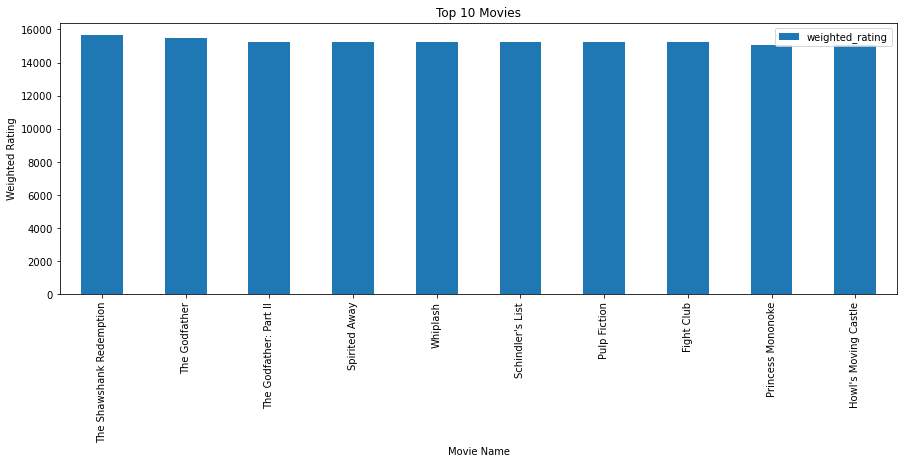

In [9]:
sorted_movies.plot(kind="bar", x="title", y="weighted_rating", figsize=(15, 5), xlabel="Movie Name", ylabel="Weighted Rating", title="Top 10 Movies")

# Content-based Filtering

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [11]:
small = pd.read_csv("./data/movies_small.csv", sep=";")
small

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
1,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.disney.go.com/cars/,49013,"[{""id"": 830, ""name"": ""car race""}, {""id"": 9663,...",en,Cars 2,Star race car Lightning McQueen and his pal Ma...,49.986590,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-06-11,559852396,106,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Ka-ciao!,Cars 2,5.8,2033
2,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
3,145000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.kungfupanda.com/,140300,"[{""id"": 478, ""name"": ""china""}, {""id"": 779, ""na...",en,Kung Fu Panda 3,"Continuing his ""legendary adventures of awesom...",56.747978,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2016-01-23,521170825,95,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Grab destiny by the rice dumplings.,Kung Fu Panda 3,6.7,1603
4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
5,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf

TfidfVectorizer(stop_words='english')

In [13]:
small["overview"].fillna("", inplace=True)

In [14]:
tfidf_mat = tfidf.fit_transform(small["overview"])

In [15]:
pd.DataFrame(tfidf_mat.toarray(), columns=tfidf.get_feature_names())

,26,abducted,accuser,adventure,adventures,assumes,attorney,awesomeness,bane,barsoom,...,terrorist,threats,toretto,transported,villainous,wanted,war,weary,world,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.190097,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.155883,0.000000
2,0.237761,0.237761,0.237761,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.237761,0.000000,0.000000,0.000000,0.389934
3,0.000000,0.000000,0.000000,0.000000,0.270444,0.00000,0.000000,0.270444,0.00000,0.000000,...,0.00000,0.270444,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.13565,0.271301,0.000000,0.13565,0.000000,...,0.13565,0.000000,0.000000,0.000000,0.13565,0.000000,0.000000,0.000000,0.000000,0.111235
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.353458,...,0.00000,0.000000,0.000000,0.176729,0.00000,0.000000,0.176729,0.176729,0.144920,0.000000


In [16]:
similarity = linear_kernel(tfidf_mat, tfidf_mat)

In [17]:
similarity

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.02259057],
       [0.        , 0.        , 1.        , 0.        , 0.0433744 ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.03213867],
       [0.        , 0.        , 0.0433744 , 0.        , 1.        ,
        0.01612024],
       [0.        , 0.02259057, 0.        , 0.03213867, 0.01612024,
        1.        ]])

# Similar movies

In [18]:
movie_title = "John Carter"

In [19]:
def similar_movies(movie_title, nr_movie):
    movie_idx = list(small.title.values).index(movie_title)
    similar_dict = {}
    for idx, title in enumerate(small["title"].values):
        if title not in similar_dict.keys():
            similar_dict[title] = list(similarity[movie_idx])[idx]
    sorted_dict = dict(sorted(similar_dict.items(), key=lambda item: item[1], reverse=True))
    return [i for i in sorted_dict.keys() if i != movie_title][:nr_movie]

In [20]:
similar_movies("John Carter", 3)

['Kung Fu Panda 3', 'Cars 2', 'The Dark Knight Rises']

# Collaborative filtering

In [40]:
from surprise import Dataset, Reader
from surprise import SVD, model_selection

In [22]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [28]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [29]:
trainset = dataset.build_full_trainset()

In [36]:
list(trainset.all_ratings())

[(0, 0, 2.5),
 (0, 1, 3.0),
 (0, 2, 3.0),
 (0, 3, 2.0),
 (0, 4, 4.0),
 (0, 5, 2.0),
 (0, 6, 2.0),
 (0, 7, 2.0),
 (0, 8, 3.5),
 (0, 9, 2.0),
 (0, 10, 2.5),
 (0, 11, 1.0),
 (0, 12, 4.0),
 (0, 13, 4.0),
 (0, 14, 3.0),
 (0, 15, 2.0),
 (0, 16, 2.0),
 (0, 17, 2.5),
 (0, 18, 1.0),
 (0, 19, 3.0),
 (1, 20, 4.0),
 (1, 21, 5.0),
 (1, 22, 5.0),
 (1, 23, 4.0),
 (1, 24, 4.0),
 (1, 25, 3.0),
 (1, 26, 3.0),
 (1, 27, 4.0),
 (1, 28, 3.0),
 (1, 29, 5.0),
 (1, 30, 4.0),
 (1, 31, 3.0),
 (1, 32, 3.0),
 (1, 33, 3.0),
 (1, 34, 3.0),
 (1, 35, 3.0),
 (1, 36, 3.0),
 (1, 37, 5.0),
 (1, 38, 1.0),
 (1, 39, 3.0),
 (1, 40, 3.0),
 (1, 41, 3.0),
 (1, 42, 4.0),
 (1, 43, 4.0),
 (1, 44, 5.0),
 (1, 45, 5.0),
 (1, 46, 3.0),
 (1, 47, 4.0),
 (1, 48, 3.0),
 (1, 49, 4.0),
 (1, 50, 3.0),
 (1, 51, 4.0),
 (1, 52, 2.0),
 (1, 53, 1.0),
 (1, 54, 3.0),
 (1, 55, 4.0),
 (1, 56, 4.0),
 (1, 57, 3.0),
 (1, 58, 3.0),
 (1, 59, 3.0),
 (1, 60, 3.0),
 (1, 61, 2.0),
 (1, 62, 3.0),
 (1, 63, 3.0),
 (1, 64, 3.0),
 (1, 65, 3.0),
 (1, 66, 2.0),
 (1, 

In [37]:
svd = SVD()

In [38]:
svd.fit(trainset)

In [39]:
svd.predict(15, 1956)

Prediction(uid=15, iid=1956, r_ui=None, est=3.137261292550889, details={'was_impossible': False})

In [43]:
model_selection.cross_validate(svd, dataset, measures=["RMSE", "MAE"], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8953  0.8925  0.9016  0.8995  0.8933  0.8965  0.0035  
MAE (testset)     0.6902  0.6880  0.6947  0.6933  0.6866  0.6906  0.0031  
Fit time          0.62    0.63    0.61    0.61    0.60    0.61    0.01    
Test time         0.06    0.15    0.06    0.12    0.06    0.09    0.04    


{'test_rmse': array([0.89532029, 0.892508  , 0.90161371, 0.89952433, 0.89329535]),
 'test_mae': array([0.69019501, 0.68795674, 0.69472722, 0.69332907, 0.68662152]),
 'fit_time': (0.6181583404541016,
  0.6258714199066162,
  0.6095190048217773,
  0.6068313121795654,
  0.6006646156311035),
 'test_time': (0.060477495193481445,
  0.15048813819885254,
  0.05920839309692383,
  0.11764669418334961,
  0.05791163444519043)}